# Sklearn

## Кривые обучения для модели случайного леса разной глубины деревьев

## sklearn.ensemble.RandomForestClassifier

документация:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [1]:
from sklearn import ensemble, metrics 
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализаваны.

Считаем данные из файла

In [2]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [3]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
bioresponce.shape

(3751, 1777)

In [5]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

Распределение объектов по классам

In [6]:
bioresponce_target = bioresponce.Activity.values

In [7]:
print('bioresponse = 1: {:.2f}\nbioresponse = 0: {:.2f}'.format(sum(bioresponce_target)/float(len(bioresponce_target)), 
                1.0 - sum(bioresponce_target)/float(len(bioresponce_target))))

bioresponse = 1: 0.54
bioresponse = 0: 0.46


Выборка почти сбалансированная

In [8]:
bioresponce_data = bioresponce.iloc[:, 1:]

## Модель RandomForestClassifier

Создание модели случайного леса.
При создании модели мы может задать количество дересьем (`n_estimators`), 
максимальную грубину дерева (`max_depth`) и другие параметры.

In [9]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators=50, 
                                                          max_depth=2, 
                                                          random_state=1)

### Кривые обучения для деревьев небольшой глубиной

Посмотрим как будет меняться доля правильных ответов (accuracy) на обучении и на тесте в зависимости от размера обущающей выборки.

Для построение кривой обучения воспользуемся методом `learning_curve`. На вход метод принимает модель, данные и спосок размеров обущающей выборки `train_sizes`. В данном случае, мы будем менять обучающую выборку от 10% до 90% от исходной c шагом 20%. Оценка получается на кросс-валидации по `cv=3` фолдам.

In [10]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, 
                                                        bioresponce_data, 
                                                        bioresponce_target, 
                                                    train_sizes=np.arange(0.1,1., 0.2), 
                                                        cv=3, scoring='accuracy')

Для разных размеров обучающей выборки мы получили средние оценки на кросс-валидации для обучающей и тестовой выборках.

In [11]:
print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[ 250  750 1250 1750 2250]
[0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
[0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


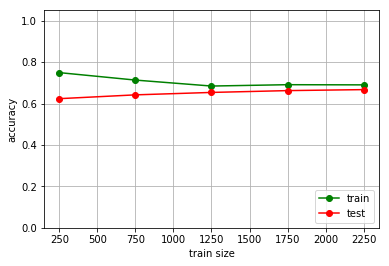

In [12]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.xlabel("train size")
plt.ylabel("accuracy")
plt.legend(loc='lower right');

Видно, что начиная с некоторого размера выборки оценка почти не менялась, это значит, что начиная с train_size = 1250 прирост данных существенно не сказывается на увеличении качества.

### Кривые обучения для деревьев большей глубины

Усложним модель, увеличив глубину деревьев. И снова построим кривые обучения.

In [13]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, 
                                                max_depth=10, random_state=1)

In [14]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, 
                                                        bioresponce_data, 
                                                        bioresponce_target, 
                                                    train_sizes=np.arange(0.1,1, 0.2), 
                                                        cv=3, scoring='accuracy')

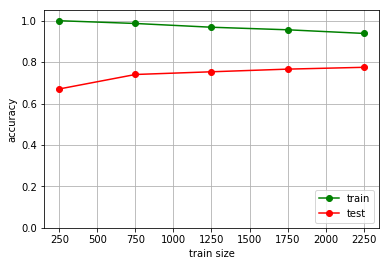

In [15]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.xlabel("train size")
plt.ylabel("accuracy")
plt.legend(loc='lower right');

Видно, что при увеличении размера выборки качество на тесте увеличивается. Возможно при увеличении данных в обучении мы получим более высокое качество. В этом случае резонно увеличивать размер обучающей выборки.

Размер обучающей выборки и сложности модели значительно сказываются на времени построения модели. С этой точки зрения строить кривые обучения очень полезно, можно проанализировать имеет ли смысл добавлять больше данных в обучение.